<a href="https://colab.research.google.com/github/Jaswant-Reddy/Sales_predicton_using_ML.ipynb/blob/main/Sales_predicton_using_ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Summary
Objective:

In this data science project, the goal is to predict future sales for product and service-based businesses. The prediction factors include advertising expenditures, audience segmentation, and advertising platforms.

Scope:

Sales prediction is a critical tool for businesses, aiding in decision-making related to advertising costs and strategies. The project employs Python for machine learning to forecast future sales.

Key Components:

Advertising Expenditure Analysis: Explore the impact of advertising costs on sales predictions.
Audience Segmentation: Understand how different audience segments contribute to variations in sales.
Platform Influence: Investigate the role of advertising platforms in shaping sales outcomes.
Implementation:

Python will be the primary tool for implementing machine learning models. Techniques such as regression analysis and predictive modeling will be employed.

Outcome:

The project aims to deliver a robust sales prediction model, enabling businesses to make data-driven decisions, optimize advertising strategies, and enhance operational efficiency.

# Problem Statement
The problem at hand involves predicting future sales for product and service-based businesses. With the dynamic nature of the market, businesses need to anticipate sales figures based on various factors, including advertising expenses, audience targeting, and the choice of advertising platforms.

Challenges:

Variable Impact of Advertising: Understanding how different levels of advertising expenditure influence sales is a complex challenge.
Audience Segmentation: Identifying and analyzing the diverse audience segments to predict their impact on sales.
Platform Optimization: Determining the optimal advertising platforms for maximizing sales outcomes.
Objective:

Develop a machine learning model using Python to predict future sales. The model should provide actionable insights into the relationships between advertising investments, audience segments, and advertising platforms with sales figures.

Importance:

Accurate sales predictions empower businesses to optimize their advertising strategies, allocate resources efficiently, and adapt to changing market dynamics effectively.

Approach:

The project will utilize Python's machine learning capabilities, employing regression analysis and predictive modeling techniques to create a robust sales prediction model.

Outcome:

The successful execution of this project will result in a reliable tool for businesses, enabling them to make informed decisions, enhance marketing strategies, and achieve better sales forecasting accuracy.

# 1. Know your data

In [1]:
# Import Libraries
# Importing Numpy & Pandas for data processing & data wrangling
import numpy as np
import pandas as pd

# Importing  tools for visualization
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Import preprocessing libraries
from sklearn.preprocessing import MinMaxScaler,StandardScaler

# Import Model
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from xgboost import XGBRegressor
import xgboost as xgb

# Import evaluation metric libraries
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

# Import model selection libraries
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV

# Import tree for visualization
from sklearn.tree import export_graphviz
from sklearn import tree
from IPython.display import SVG,display
from graphviz import Source

# Library used for ignore warnings
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
# Load Dataset
df = pd.read_csv("/content/drive/MyDrive/Sales.csv/Advertising.csv")

In [3]:
# Dataset First Look
# View top 5 rows of the dataset
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
# Dataset Rows & Columns count
# Checking number of rows and columns of the dataset using shape
print("Number of rows are: ",df.shape[0])
print("Number of columns are: ",df.shape[1])

Number of rows are:  200
Number of columns are:  5


In [5]:
# Dataset Info
# Checking information about the dataset using info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [6]:
# Dataset Duplicate Value Count
dup = df.duplicated().sum()
print(f'number of duplicated rows are {dup}')

number of duplicated rows are 0


In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

,0
Unnamed: 0,0
TV,0
Radio,0
Newspaper,0
Sales,0


# 2.Understanding Variables

In [8]:
# Dataset Columns
df.columns

Index(['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales'], dtype='object')

In [9]:
# Dataset Describe (all columns included)
df.describe(include= 'all').round(2)

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.00,200.00,200.00,200.00,200.00
mean,100.50,147.04,23.26,30.55,14.02
std,57.88,85.85,14.85,21.78,5.22
min,1.00,0.70,0.00,0.30,1.60
25%,50.75,74.38,9.98,12.75,10.38
50%,100.50,149.75,22.90,25.75,12.90
75%,150.25,218.82,36.52,45.10,17.40
max,200.00,296.40,49.60,114.00,27.00


In [11]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("No. of unique values in",i,"is",df[i].nunique())

No. of unique values in Unnamed: 0 is 200
No. of unique values in TV is 190
No. of unique values in Radio is 167
No. of unique values in Newspaper is 172
No. of unique values in Sales is 121


# Data Wrangling

In [12]:
# Removing the 'Unnamed: 0' column as it's no longer needed
df.drop(['Unnamed: 0'], axis=1, inplace=True)

In [13]:
# New updated DataFrame
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [14]:
# Defining dependent variable
dependent_variable = ['Sales']

# 4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables

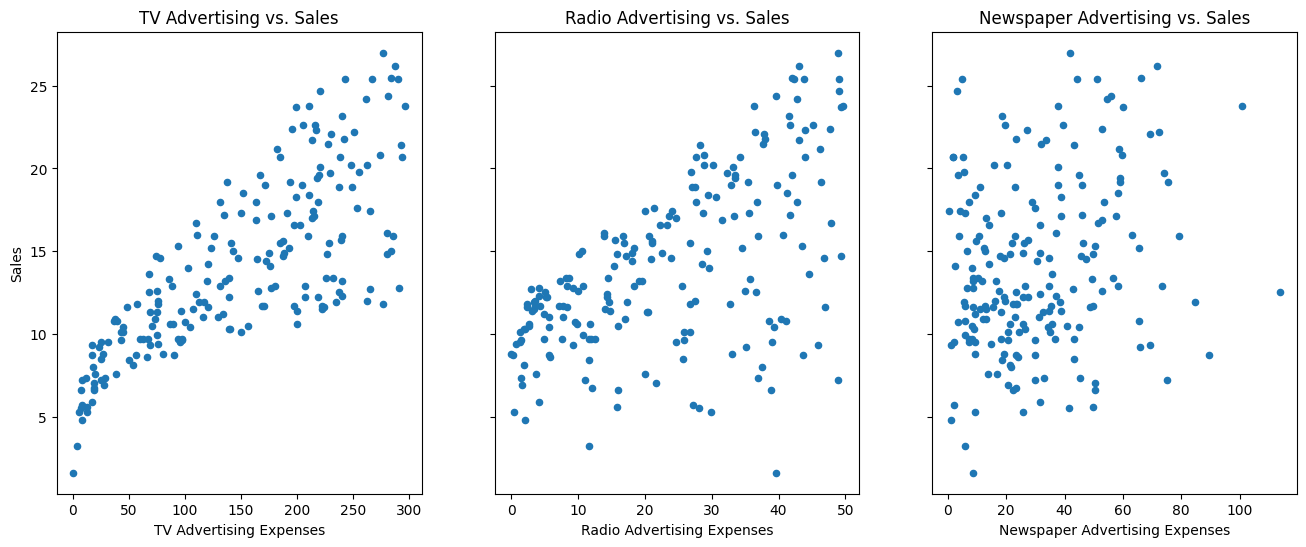

In [15]:
# Chart - 1 Scatterplot visualization code for numerical variable vs target variable
# Creating subplots with 1 row and 3 columns, sharing the y-axis for better comparison
fig, axs = plt.subplots(1, 3, sharey=True, figsize=(16, 6))

# Scatter plot for TV advertising expenses vs. Sales
df.plot(kind="scatter", x='TV', y='Sales', ax=axs[0])
axs[0].set_title('TV Advertising vs. Sales')
axs[0].set_xlabel('TV Advertising Expenses')
axs[0].set_ylabel('Sales')

# Scatter plot for Radio advertising expenses vs. Sales
df.plot(kind="scatter", x='Radio', y='Sales', ax=axs[1])
axs[1].set_title('Radio Advertising vs. Sales')
axs[1].set_xlabel('Radio Advertising Expenses')
axs[1].set_ylabel('Sales')

# Scatter plot for Newspaper advertising expenses vs. Sales
df.plot(kind="scatter", x='Newspaper', y='Sales', ax=axs[2])
axs[2].set_title('Newspaper Advertising vs. Sales')
axs[2].set_xlabel('Newspaper Advertising Expenses')
axs[2].set_ylabel('Sales')

# Displaying the plots
plt.show()

Chart1: What is/are the insight(s) found from the chart?
From the above plots we can analyse that:


*   Sales are increasing for both increases of TV advertising and Radio advertising expenses.
*   Outliers are present in Newspaper advertising vs. Sales graph.




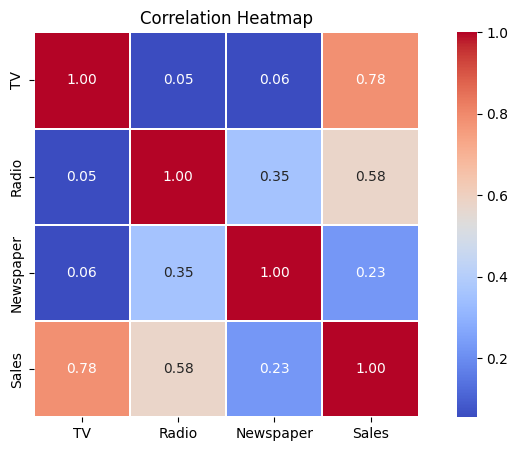

In [16]:
# Correlation Heatmap visualization code
# Set the size of the plot
plt.figure(figsize=(10, 5))

# Create a heatmap of the correlation matrix with annotations
sns.heatmap(df.corr(), annot=True, linewidths=0.1, fmt='.2f', square=True, cmap='coolwarm')

# Add a title to the plot
plt.title("Correlation Heatmap")

# Display the plot
plt.show()

What is/are the insight(s) found from the chart?


From the above correlation heatmap we get to know that, TV Advertising expenses and Sales are highly correlated.

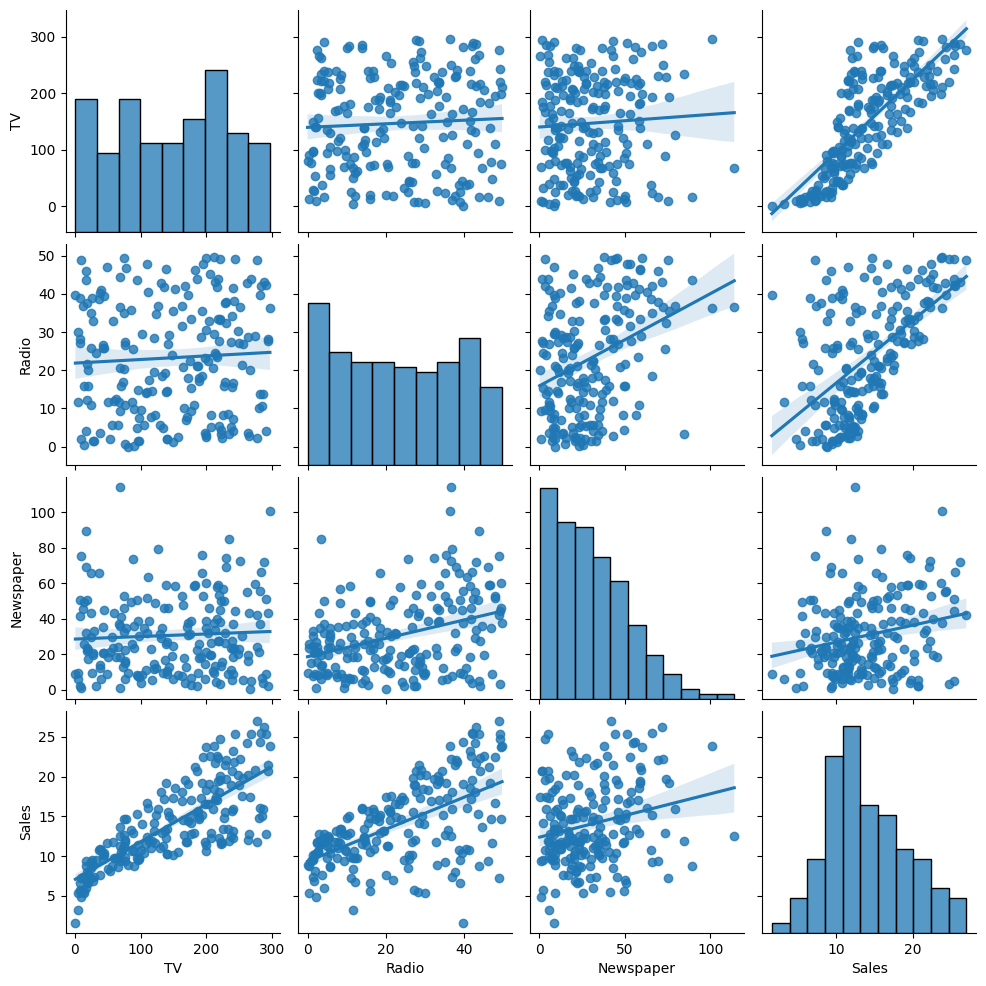

In [17]:
# Chart - 3 Pair plot visualization code
sns.pairplot(df,kind="reg");

# Display the plot
plt.show()

# 5. Feature Engineering & Data Pre-processing

In [18]:
# Removing the outlier from newspaper
df=df[df['Newspaper']<=90]

In [19]:
# Select the features wisely to avoid overfitting
features = [i for i in df.columns if i not in ['Sales']]
features

['TV', 'Radio', 'Newspaper']

In [20]:
# Remove multicollinearity by using VIF technique
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [21]:
continuous_variables = ['TV', 'Radio', 'Newspaper']

In [22]:
continuous_feature_df = pd.DataFrame(df[continuous_variables])

In [23]:
continuous_feature_df

,TV,Radio,Newspaper
0,230.1,37.8,69.2
1,44.5,39.3,45.1
2,17.2,45.9,69.3
3,151.5,41.3,58.5
4,180.8,10.8,58.4
...,...,...,...
195,38.2,3.7,13.8
196,94.2,4.9,8.1
197,177.0,9.3,6.4
198,283.6,42.0,66.2


In [24]:
calc_vif(df[[i for i in continuous_feature_df]])

,variables,VIF
0,TV,2.502183
1,Radio,3.275285
2,Newspaper,3.126386


In [25]:
# Final data for modeling
df.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


What all feature selection methods have i used and why?

I check the multicollinearity using VIF for the continuous features present in the dataframe.

Which all features i found important and why?

I take all the numerical variable from the dataset exclude 'Sales' variable, as our features.

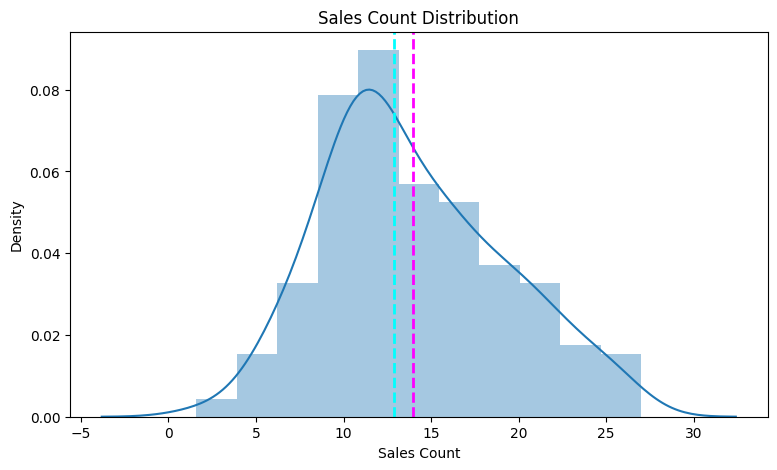

In [26]:
# Transform the data
# Visualizing the distribution of the dependent variable - Sales
plt.figure(figsize=(9,5))
sns.distplot(df[dependent_variable])
plt.xlabel('Sales Count')
plt.title('Sales Count Distribution')
plt.axvline(df[dependent_variable[0]].mean(), color='magenta', linestyle='dashed', linewidth=2)
plt.axvline(df[dependent_variable[0]].median(), color='cyan', linestyle='dashed', linewidth=2)
plt.show()

In [27]:
# Skew of the dependent variable
df[dependent_variable].skew()

,0
Sales,0.40713


In [28]:
# Defining dependent and independent variables
X = df.drop('Sales',axis=1)
y = df[dependent_variable]

In [29]:
features

['TV', 'Radio', 'Newspaper']

In [30]:
features = [i for i in df.columns if i not in ['Sales']]

In [31]:
# Scaling your data
scaler = StandardScaler()
X = scaler.fit_transform(df[features])

Which method have i used to scale the data and why?

In this i have different independent features of different scale so i have used standard scalar method to scale our independent features into one scale.

In [32]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [33]:
# Checking the train distribution of dependent variable
y_train.value_counts()

,count
Sales,
9.7,4
15.9,3
20.7,3
12.2,3
11.8,3
...,...
12.4,1
12.3,1
11.2,1


# 6. ML Model Implementation

In [34]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
   and returns a list of the model scores'''

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test,y_pred)
  y_train_pred = model.predict(X_train)  # Predict the target variable for the training set
  r2_train = r2_score(y_train, y_train_pred)
  r2 = r2_score(y_test,y_pred)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(12,4))
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Sales', fontsize=12)


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [35]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

In [36]:
# Import the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Predict on the model
y_pred_li = reg.predict(X_test)

MSE : 2.4320766824695403
RMSE : 1.5595116807736775
MAE : 1.177152628314206
Train R2 : 0.8898322019518987
Test R2 : 0.9098946359000558
Adjusted R2 :  0.9023858555583938


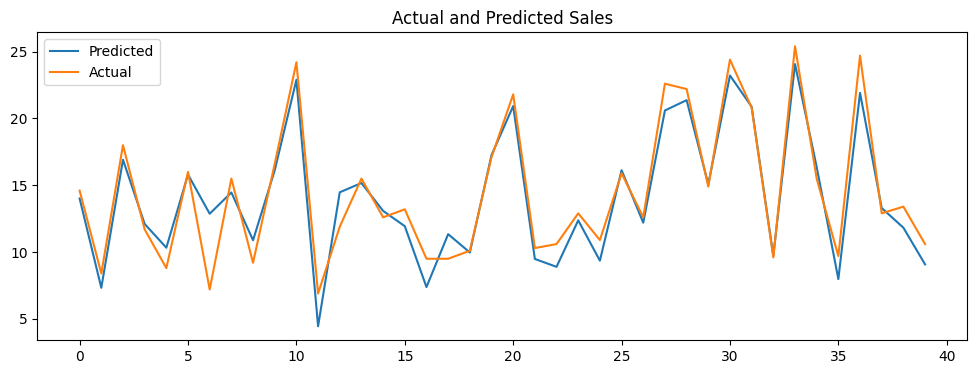

In [37]:
# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test,y_pred_li)
score['Linear regression'] = linear_score

In [38]:
# Updated Evaluation Metric Score chart
score

,Linear regression
MSE,2.432077
RMSE,1.559512
MAE,1.177153
Train R2,0.889832
Test R2,0.909895
Adjusted R2,0.902386


In [39]:
# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [40]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.8794637215026521


In [41]:
# Use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [42]:
# Predict on test data
y_pred_li2 = best_reg.predict(X_test)

MSE : 2.4320766824695403
RMSE : 1.5595116807736775
MAE : 1.177152628314206
Train R2 : 0.8898322019518987
Test R2 : 0.9098946359000558
Adjusted R2 :  0.9023858555583938


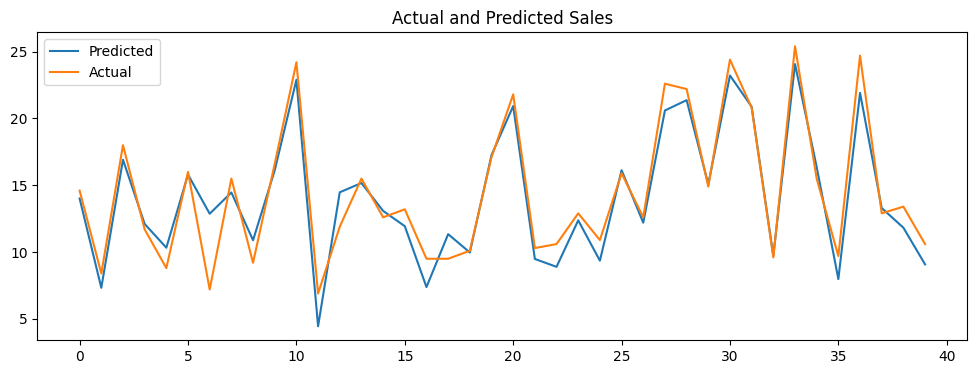

In [43]:
# Visualizing evaluation Metric Score chart
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

In [44]:
# Updated Evaluation Metric Score chart
score['Linear regression tuned'] = linear_score2
score

,Linear regression,Linear regression tuned
MSE,2.432077,2.432077
RMSE,1.559512,1.559512
MAE,1.177153,1.177153
Train R2,0.889832,0.889832
Test R2,0.909895,0.909895
Adjusted R2,0.902386,0.902386


Which hyperparameter optimization technique have i used and why?

-GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

-To reduce time and effort i have used GridSearchCV.



---



---



Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

-For untuned linear regression model, I found R2 score of 0.889832 & 0.909895 for train and test set. And 2.432077 & 1.177153 as MSE and MAE respectively.

-For tuned linear regression model, I found R2 score of 0.889832 & 0.909895 for train and test set. And 2.432077 & 1.177153 as MSE and MAE respectively.

-For Both tuned and untuned model, no changes is seen. Both are given good accuracy.

In [45]:
# Import the Lasso Regression class
lasso = Lasso()

# Fit the lasso regression model to the training data
lasso.fit(X_train, y_train)

# Predict on the model
y_pred_lasso1 = lasso.predict(X_test)

MSE : 4.412196366645484
RMSE : 2.1005228793434942
MAE : 1.500579778178449
Train R2 : 0.8182193987500639
Test R2 : 0.8365337067853652
Adjusted R2 :  0.8229115156841457


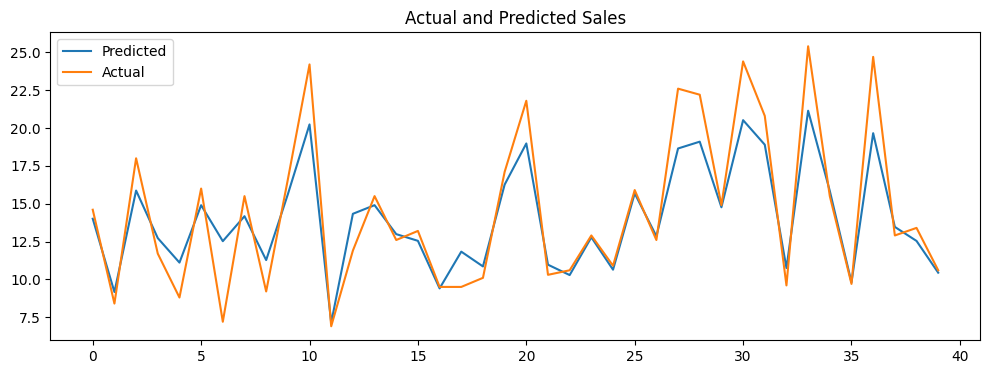

In [46]:
# Visualizing evaluation Metric Score chart
lasso_score = evaluate_model(lasso, y_test,y_pred_lasso1)
score['Lasso regression'] = lasso_score

In [47]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression
MSE,2.432077,2.432077,4.412196
RMSE,1.559512,1.559512,2.100523
MAE,1.177153,1.177153,1.500580
Train R2,0.889832,0.889832,0.818219
Test R2,0.909895,0.909895,0.836534
Adjusted R2,0.902386,0.902386,0.822912


In [48]:
# Define the model
lasso = Lasso()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
lasso_regressor = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
lasso_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [49]:
# Getting optimum parameters
print("The optimum alpha value is found out to be :" ,lasso_regressor.best_params_)
print("\nUsing ",lasso_regressor.best_params_, " the negative mean squared error is: ", lasso_regressor.best_score_)

The optimum alpha value is found out to be : {'alpha': 0.01}

Using  {'alpha': 0.01}  the negative mean squared error is:  -3.2038025925545


In [50]:
# Import the Lasso Regression class with best alpha
lasso = Lasso(alpha = lasso_regressor.best_params_['alpha'])

# Fit the lasso regression model to your training data
lasso.fit(X_train, y_train)

# Predict the model
y_pred_lassocv = lasso.predict(X_test)

MSE : 2.4238565146909337
RMSE : 1.5568739559421416
MAE : 1.1755801408509008
Train R2 : 0.8898231407789969
Test R2 : 0.9101991827163601
Adjusted R2 :  0.9027157812760568


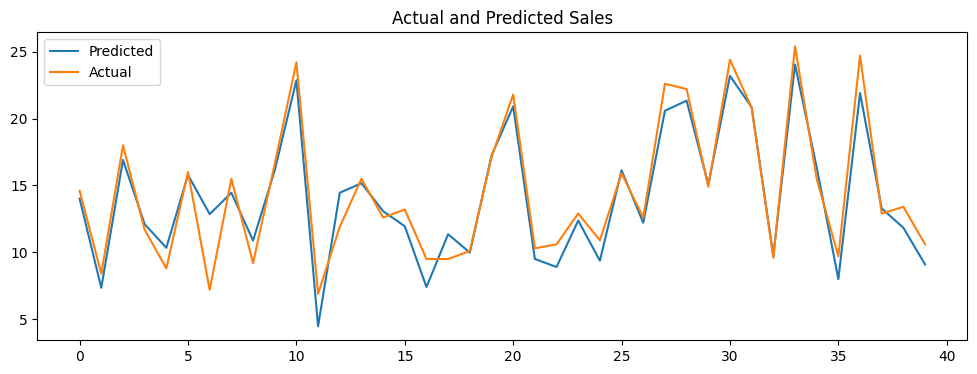

In [51]:
#Evaluation matrices for Lasso regression
lasso2 = evaluate_model(lasso, y_test,y_pred_lassocv)

name = 'Lasso with alpha = ' + str(lasso_regressor.best_params_['alpha'])

score[name] = lasso2

Which hyperparameter optimization technique have you used and why?

GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort i have used GridSearchCV.

Have i seen any improvement?

Note down the improvement with updates Evaluation metric Score Chart.

In [52]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01
MSE,2.432077,2.432077,4.412196,2.423857
RMSE,1.559512,1.559512,2.100523,1.556874
MAE,1.177153,1.177153,1.500580,1.175580
Train R2,0.889832,0.889832,0.818219,0.889823
Test R2,0.909895,0.909895,0.836534,0.910199
Adjusted R2,0.902386,0.902386,0.822912,0.902716


After tuning i have seen that there is increase in train and test set performance, which is upto 88% for train set and 91% for test set.

In [53]:
# Ridge regressor class
ridge = Ridge()

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on the model
y_pred_ridge1 = ridge.predict(X_test)

MSE : 2.44804782650871
RMSE : 1.5646238610313694
MAE : 1.180541993916469
Train R2 : 0.8897995235722359
Test R2 : 0.9093029252195848
Adjusted R2 :  0.9017448356545502


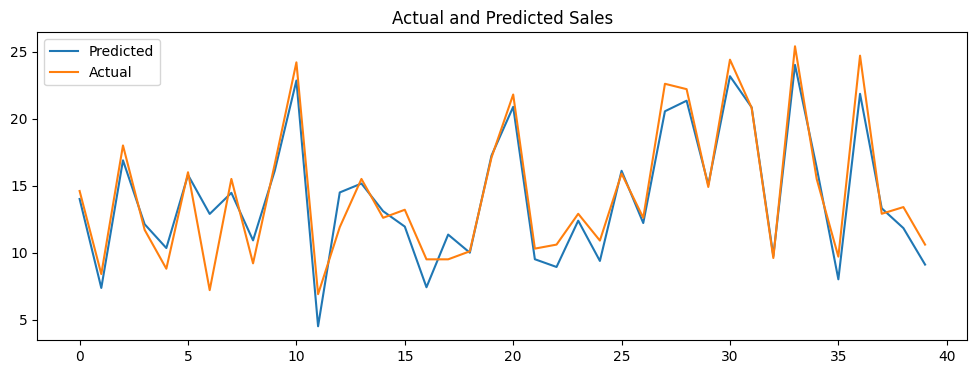

In [54]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(ridge, y_test,y_pred_ridge1)
score['Ridge'] = result

In [55]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge
MSE,2.432077,2.432077,4.412196,2.423857,2.448048
RMSE,1.559512,1.559512,2.100523,1.556874,1.564624
MAE,1.177153,1.177153,1.500580,1.175580,1.180542
Train R2,0.889832,0.889832,0.818219,0.889823,0.889800
Test R2,0.909895,0.909895,0.836534,0.910199,0.909303
Adjusted R2,0.902386,0.902386,0.822912,0.902716,0.901745


I have used Ridge regression technique to check the performance of the model and i have found that there is no majorly difference in between linear regression and Ridge. Both models are quite similar.

In [62]:
# Import Ridge regressor Class
ridge = Ridge()

# Define the parameters to be optimized & Perform grid search
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=5)

# Fitting model
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [63]:
# Getting optimum parameters
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -3.2105087592751773


In [64]:
# Initiate ridge with best alpha
ridge = Ridge(alpha = ridge_regressor.best_params_['alpha'])

# Fit the ridge regression model to your training data
ridge.fit(X_train, y_train)

# Predict on model
y_pred_ridge = ridge.predict(X_test)

MSE : 2.44804782650871
RMSE : 1.5646238610313694
MAE : 1.180541993916469
Train R2 : 0.8897995235722359
Test R2 : 0.9093029252195848
Adjusted R2 :  0.9017448356545502


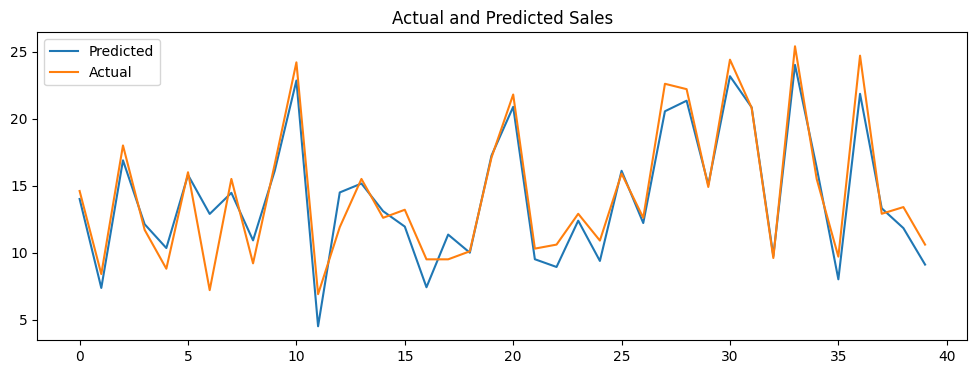

In [65]:
# Evaluation matrices for Ridge regression
result = evaluate_model(ridge, y_test,y_pred_ridge)

namer = 'Ridge with alpha = ' + str(ridge_regressor.best_params_['alpha'])

score[namer] = result

Which hyperparameter optimization technique have i used and why?
GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [66]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1
MSE,2.432077,2.432077,4.412196,2.423857,2.448048,2.448048
RMSE,1.559512,1.559512,2.100523,1.556874,1.564624,1.564624
MAE,1.177153,1.177153,1.500580,1.175580,1.180542,1.180542
Train R2,0.889832,0.889832,0.818219,0.889823,0.889800,0.889800
Test R2,0.909895,0.909895,0.836534,0.910199,0.909303,0.909303
Adjusted R2,0.902386,0.902386,0.822912,0.902716,0.901745,0.901745


I have tuned Ridge regression using hyperparametric technique & check the performance of the model and i have found that the tuned and untuned Ridge regression model both are given the same accuracy for the train and test set.

In [67]:
# Import Decision Tree Regressor class
dt = DecisionTreeRegressor(random_state=1)

# Fit the Decision Tree model to your training data
dt.fit(X_train,y_train)

# Predict on the model
y_pred_dt1 = dt.predict(X_test)

MSE : 1.3222499999999997
RMSE : 1.1498912992104948
MAE : 0.9125
Train R2 : 1.0
Test R2 : 0.9510123103683663
Adjusted R2 :  0.9469300028990635


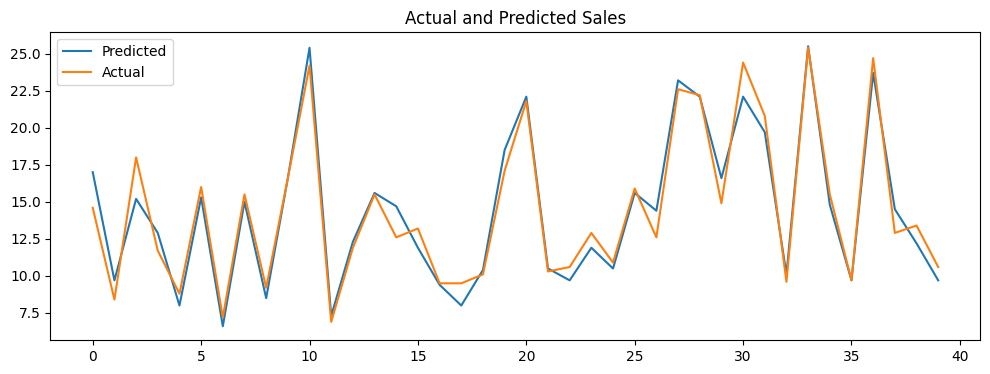

In [68]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(dt, y_test,y_pred_dt1)
score['Decision tree'] = result

In [69]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1,Decision tree
MSE,2.432077,2.432077,4.412196,2.423857,2.448048,2.448048,1.322250
RMSE,1.559512,1.559512,2.100523,1.556874,1.564624,1.564624,1.149891
MAE,1.177153,1.177153,1.500580,1.175580,1.180542,1.180542,0.912500
Train R2,0.889832,0.889832,0.818219,0.889823,0.889800,0.889800,1.000000
Test R2,0.909895,0.909895,0.836534,0.910199,0.909303,0.909303,0.951012
Adjusted R2,0.902386,0.902386,0.822912,0.902716,0.901745,0.901745,0.946930


From the decision tree algorithm i got train R2 score is 1 and test R2 score is 95% which shows the overfitting condition on train set.

So, i have decided to tune the data using GridSearchCV.

In [70]:
# Regressor
dt_model = DecisionTreeRegressor(random_state=1)

# Hyperparameter Grid
grid = {'max_depth' : [8,10,12,14,16],
        'min_samples_split' : np.arange(35,50),
        'min_samples_leaf' : np.arange(22,31,2)}

# Fitting model with hypertuned paramaters using grid search
dt_gridsearch = GridSearchCV(dt_model,
                             grid,
                             cv=6,
                             scoring= 'neg_root_mean_squared_error')
dt_gridsearch.fit(X_train,y_train)
dt_best_params = dt_gridsearch.best_params_

In [72]:
dt_best_params

{'max_depth': 8, 'min_samples_leaf': 22, 'min_samples_split': 35}

In [71]:
# Building Decision Tree model with best parameters
dt_model = DecisionTreeRegressor(max_depth=dt_best_params['max_depth'],
                                 min_samples_leaf=dt_best_params['min_samples_leaf'],
                                 min_samples_split=dt_best_params['min_samples_split'],
                                 random_state=1)

In [73]:
# Fitting model
dt_model.fit(X_train,y_train)

DecisionTreeRegressor(max_depth=8, min_samples_leaf=22, min_samples_split=35,
                      random_state=1)

In [74]:
# Predict on the model
y_pred_dt = dt_model.predict(X_test)

MSE : 4.853930208143661
RMSE : 2.2031636816504716
MAE : 1.7902569055944055
Train R2 : 0.8705971402540121
Test R2 : 0.8201680268253714
Adjusted R2 :  0.805182029060819


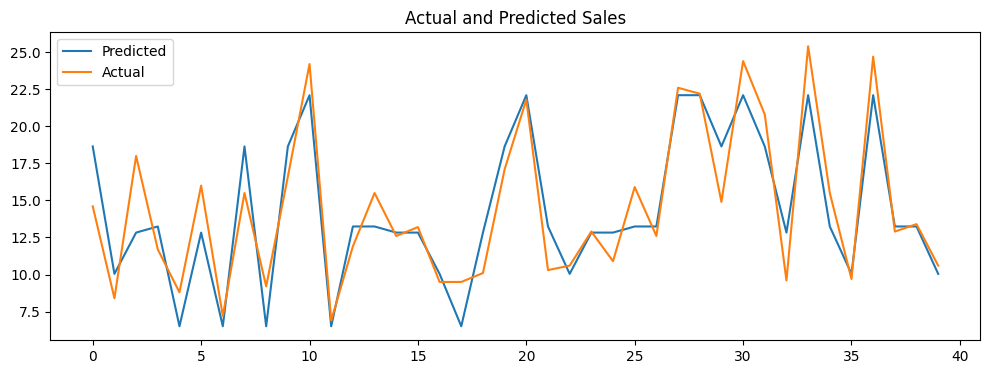

In [75]:
# Evaluation matrices for DecisionTree
result = evaluate_model(dt_model, y_test,y_pred_dt)
score['Decision tree tuned'] = result

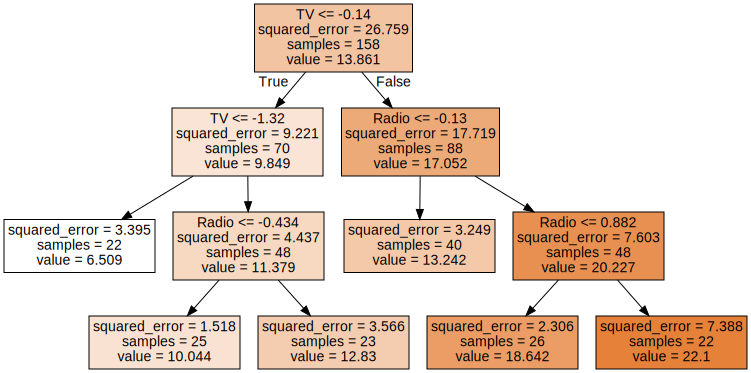

In [76]:
# Decision tree diagram
graph = Source(tree.export_graphviz(dt_model,
                                    out_file=None,
                                    feature_names=features,
                                    filled= True))
display(SVG(graph.pipe(format='svg')))

Which hyperparameter optimization technique have i used and why?
GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.



In [77]:
# Updated Evaluation Metric Score Chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1,Decision tree,Decision tree tuned
MSE,2.432077,2.432077,4.412196,2.423857,2.448048,2.448048,1.322250,4.853930
RMSE,1.559512,1.559512,2.100523,1.556874,1.564624,1.564624,1.149891,2.203164
MAE,1.177153,1.177153,1.500580,1.175580,1.180542,1.180542,0.912500,1.790257
Train R2,0.889832,0.889832,0.818219,0.889823,0.889800,0.889800,1.000000,0.870597
Test R2,0.909895,0.909895,0.836534,0.910199,0.909303,0.909303,0.951012,0.820168
Adjusted R2,0.902386,0.902386,0.822912,0.902716,0.901745,0.901745,0.946930,0.805182


From the above tuned Decision tree regression, it has seen that earlier we have faced overfitting condition. After tuning it there is no such condition and it looks like model performs with good accuracy around 87% on train and 82% on test data.

In [78]:
# Import Random Forest Regressor class
rf = RandomForestRegressor(random_state=0)

# Fit the Random Forest model to your training data
rf.fit(X_train,y_train)

# Predict on the model
y_pred_rf1 = rf.predict(X_test)

MSE : 0.5587373749999969
RMSE : 0.747487374475313
MAE : 0.6071249999999965
Train R2 : 0.9969560499583574
Test R2 : 0.9792994871528882
Adjusted R2 :  0.9775744444156289


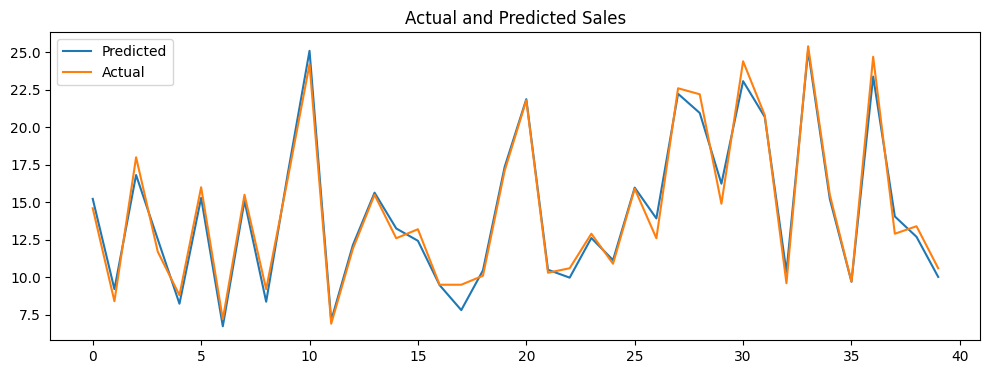

In [79]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(rf, y_test,y_pred_rf1)
score['Random forest'] = result

In [80]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1,Decision tree,Decision tree tuned,Random forest
MSE,2.432077,2.432077,4.412196,2.423857,2.448048,2.448048,1.322250,4.853930,0.558737
RMSE,1.559512,1.559512,2.100523,1.556874,1.564624,1.564624,1.149891,2.203164,0.747487
MAE,1.177153,1.177153,1.500580,1.175580,1.180542,1.180542,0.912500,1.790257,0.607125
Train R2,0.889832,0.889832,0.818219,0.889823,0.889800,0.889800,1.000000,0.870597,0.996956
Test R2,0.909895,0.909895,0.836534,0.910199,0.909303,0.909303,0.951012,0.820168,0.979299
Adjusted R2,0.902386,0.902386,0.822912,0.902716,0.901745,0.901745,0.946930,0.805182,0.977574


Here i have seen that using random forest, regression accuracy of the train and test model increases 99% and 97% respectively, which seems to be a good model for prediction.

In [81]:
# Random forest model
rf_model = RandomForestRegressor(random_state=0)
rf_params = {'n_estimators':[300],                    # limited due to computational power availability
             'min_samples_leaf':np.arange(20,25)}     # Approximate range from a decision tree model

In [82]:
# Fitting a Random Forest model with best parameters obtained from gridsearch
rf_gridsearch = GridSearchCV(rf_model,rf_params,cv=6,scoring='neg_root_mean_squared_error')
rf_gridsearch.fit(X_train,y_train)
rf_best_params = rf_gridsearch.best_params_

In [85]:
# Best parameters for random forests
rf_best_params

{'min_samples_leaf': 20, 'n_estimators': 300}

In [86]:
# Building Random Forest model with best parameters
rf_model = RandomForestRegressor(n_estimators=rf_best_params['n_estimators'],
                                 min_samples_leaf=rf_best_params['min_samples_leaf'],
                                 random_state=0)

In [87]:
# Fitting model
rf_model.fit(X_train,y_train)

RandomForestRegressor(min_samples_leaf=20, n_estimators=300, random_state=0)

In [88]:
# Predict on the model
y_pred_rf = rf_model.predict(X_test)

MSE : 4.290102078955843
RMSE : 2.071256159666361
MAE : 1.6948545471585574
Train R2 : 0.8424349168186637
Test R2 : 0.8410571456744826
Adjusted R2 :  0.8278119078140229


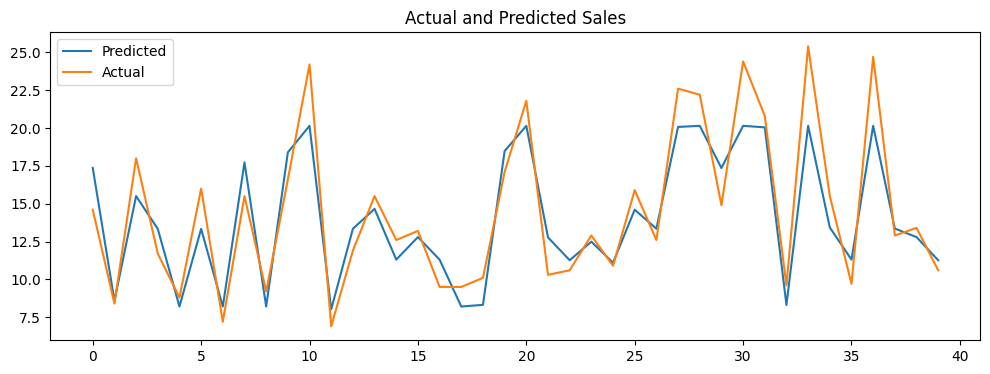

In [89]:
# Evaluation matrices for RandomForest
result = evaluate_model(rf_model, y_test,y_pred_rf)
score['Random forest tuned'] = result

Which hyperparameter optimization technique have i used and why?
GridSearchCV is used to find the best hyperparameters for a machine learning model by searching over a specified parameter grid. It helps to ensure that a model is not overfitting or underfitting by evaluating the model's performance using cross-validation techniques. GridSearchCV can save time and resources compared to manually tuning the parameters of a model.

To reduce time and effort we have used GridSearchCV.

Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [90]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Lasso regression,Lasso with alpha = 0.01,Ridge,Ridge with alpha = 1,Decision tree,Decision tree tuned,Random forest,Random forest tuned
MSE,2.432077,2.432077,4.412196,2.423857,2.448048,2.448048,1.322250,4.853930,0.558737,4.290102
RMSE,1.559512,1.559512,2.100523,1.556874,1.564624,1.564624,1.149891,2.203164,0.747487,2.071256
MAE,1.177153,1.177153,1.500580,1.175580,1.180542,1.180542,0.912500,1.790257,0.607125,1.694855
Train R2,0.889832,0.889832,0.818219,0.889823,0.889800,0.889800,1.000000,0.870597,0.996956,0.842435
Test R2,0.909895,0.909895,0.836534,0.910199,0.909303,0.909303,0.951012,0.820168,0.979299,0.841057
Adjusted R2,0.902386,0.902386,0.822912,0.902716,0.901745,0.901745,0.946930,0.805182,0.977574,0.827812


After tuning the random forest model it has seen that there is drop in performance both in train and test score so i am not going to use the tuned model.

In [91]:
# Defining a function to print evaluation matrix
def evaluate_model(model, y_test, y_pred):

  '''takes model, y test and y pred values to print evaluation metrics, plot the actual and predicted values,
   and returns a list of the model scores'''

  # Calculating Evaluation Matrix
  mse = mean_squared_error(y_test,y_pred)
  rmse = np.sqrt(mse)
  mae = mean_absolute_error(y_test,y_pred)
  y_train_pred = model.predict(X_train)  # Predict the target variable for the training set
  r2_train = r2_score(y_train, y_train_pred)
  r2 = r2_score(y_test,y_pred)
  r2_adjusted = 1-(1-r2)*((len(X_test)-1)/(len(X_test)-X_test.shape[1]-1))

  # Printing Evaluation Matrix
  print("MSE :" , mse)
  print("RMSE :" ,rmse)
  print("MAE :" ,mae)
  print("Train R2 :" ,r2_train)
  print("Test R2 :" ,r2)
  print("Adjusted R2 : ", r2_adjusted)


  # plot actual and predicted values
  plt.figure(figsize=(12,4))
  plt.plot((y_pred)[:100])
  plt.plot((np.array(y_test)[:100]))
  plt.legend(["Predicted","Actual"])
  plt.title('Actual and Predicted Sales', fontsize=12)


  model_score = [mse,rmse,mae,r2_train,r2,r2_adjusted]
  return model_score

In [92]:
# Create a score dataframe
score = pd.DataFrame(index = ['MSE', 'RMSE', 'MAE', 'Train R2', 'Test R2', 'Adjusted R2'])

In [93]:
# Import the LinearRegression class
reg = LinearRegression()

# Fit the linear regression model to the training data
reg.fit(X_train, y_train)

# Predict on the model
y_pred_li = reg.predict(X_test)

MSE : 2.4320766824695403
RMSE : 1.5595116807736775
MAE : 1.177152628314206
Train R2 : 0.8898322019518987
Test R2 : 0.9098946359000558
Adjusted R2 :  0.9023858555583938


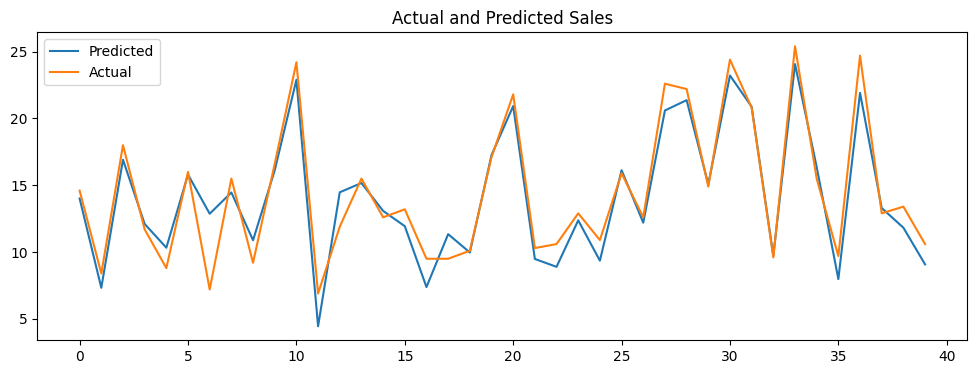

In [94]:
# Visualizing evaluation Metric Score chart
linear_score = evaluate_model(reg, y_test,y_pred_li)
score['Linear regression'] = linear_score

In [95]:
# Updated Evaluation Metric Score chart
score

,Linear regression
MSE,2.432077
RMSE,1.559512
MAE,1.177153
Train R2,0.889832
Test R2,0.909895
Adjusted R2,0.902386


In [96]:
# Define the model
reg = LinearRegression()

# Define the parameters to be optimized
param_grid = {'fit_intercept': [True, False]}

# Perform grid search
grid_search = GridSearchCV(reg, param_grid, cv=5, scoring='r2', return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False]},
             return_train_score=True, scoring='r2')

In [97]:
# Print the best parameters and the corresponding score
print("Best parameters: ", grid_search.best_params_)
print("Best R2 score: ", grid_search.best_score_)

Best parameters:  {'fit_intercept': True}
Best R2 score:  0.8794637215026521


In [98]:
# Use the best parameter to train the model
best_reg = grid_search.best_estimator_
best_reg.fit(X_train, y_train)

LinearRegression()

In [99]:
# Predict on test data
y_pred_li2 = best_reg.predict(X_test)

MSE : 2.4320766824695403
RMSE : 1.5595116807736775
MAE : 1.177152628314206
Train R2 : 0.8898322019518987
Test R2 : 0.9098946359000558
Adjusted R2 :  0.9023858555583938


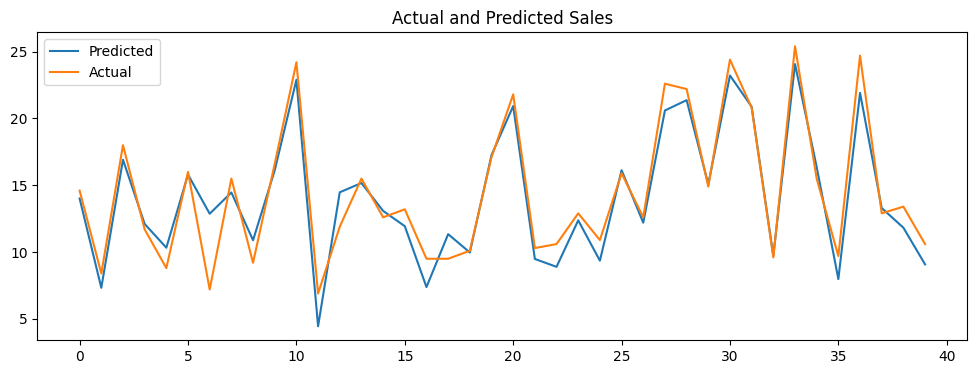

In [100]:
# Visualizing evaluation Metric Score chart
linear_score2 = evaluate_model(best_reg, y_test,y_pred_li2)

In [101]:
# Updated Evaluation Metric Score chart
score['Linear regression tuned'] = linear_score2
score

,Linear regression,Linear regression tuned
MSE,2.432077,2.432077
RMSE,1.559512,1.559512
MAE,1.177153,1.177153
Train R2,0.889832,0.889832
Test R2,0.909895,0.909895
Adjusted R2,0.902386,0.902386


Which hyperparameter optimization technique have i used and why?
Randomized search cross-validation (CV) is used to efficiently explore the hyperparameter space of a machine learning model. It works by randomly sampling from the search space of hyperparameters, rather than exhaustively trying every possible combination. This allows for a more efficient search while still providing a good chance of finding good hyperparameter values. Additionally, by using cross-validation to evaluate the performance of each set of hyperparameters, one can ensure that the model is not overfitting to the training data.

Because of its randomly sampling technique and to save the time i have decided to use Randomized search CV.

Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.



In [102]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned
MSE,2.432077,2.432077
RMSE,1.559512,1.559512
MAE,1.177153,1.177153
Train R2,0.889832,0.889832
Test R2,0.909895,0.909895
Adjusted R2,0.902386,0.902386


After using the Randomised search CV, it gave accuracy 99% on train data & 95% on test data which is comparatively less than the untuned model.


In [103]:
# Import Extreme Gradient Boosting Regressor class
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')

# Fit the Extreme Gradient Boosting model to the training data
xgb_model.fit(X_train,y_train)

# Predict on the model
y_pred_xgb1 = xgb_model.predict(X_test)

MSE : 0.5653283569170044
RMSE : 0.7518832069656859
MAE : 0.6041371035575865
Train R2 : 0.9999999403953552
Test R2 : 0.9790552854537964
Adjusted R2 :  0.977309892574946


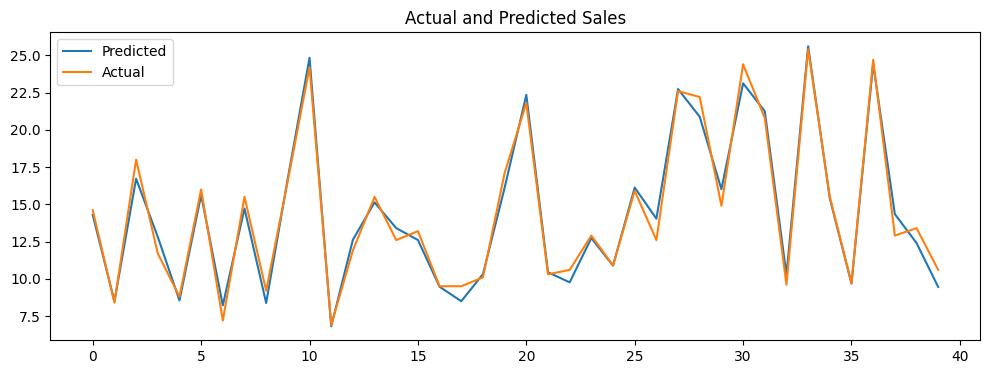

In [104]:
# Visualizing evaluation Metric Score chart
result = evaluate_model(xgb_model, y_test,y_pred_xgb1)
score['Extreme Gradient Boosting Regressor'] = result

In [105]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Extreme Gradient Boosting Regressor
MSE,2.432077,2.432077,0.565328
RMSE,1.559512,1.559512,0.751883
MAE,1.177153,1.177153,0.604137
Train R2,0.889832,0.889832,1.000000
Test R2,0.909895,0.909895,0.979055
Adjusted R2,0.902386,0.902386,0.977310


Using Extreme Gradient Boosting Regressor i have got accuracy around 100% and 97% on train and test data respectively. It is overfitting the model's training accuracy.

So, lets tune it.

In [106]:
# XG boost model
xgb_model = xgb.XGBRegressor(random_state=0,
                             objective='reg:squarederror')
xgb_params = {'n_estimators':[500],
             'min_samples_leaf':np.arange(20,22)}

In [107]:
# Perform the randomized search
xgb_search = RandomizedSearchCV(xgb_model,xgb_params,cv=6,scoring='neg_root_mean_squared_error',n_iter=100, n_jobs=-1)
xgb_search.fit(X_train,y_train)
xgb_best_params = xgb_search.best_params_

In [108]:
# Best parameters for XG boost Model
xgb_best_params

{'n_estimators': 500, 'min_samples_leaf': 20}

In [109]:
# Building a XG boost model with best parameters
xgb_model = xgb.XGBRegressor(n_estimators=xgb_best_params['n_estimators'],
                             min_samples_leaf=xgb_best_params['min_samples_leaf'],
                             random_state=0)

In [110]:
# Fitting model
xgb_model.fit(X_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, min_samples_leaf=20, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [111]:
# Predict on the model
y_pred_xgb = xgb_model.predict(X_test)

MSE : 0.5653283569170044
RMSE : 0.7518832069656859
MAE : 0.6041371035575865
Train R2 : 0.9999999403953552
Test R2 : 0.9790552854537964
Adjusted R2 :  0.977309892574946


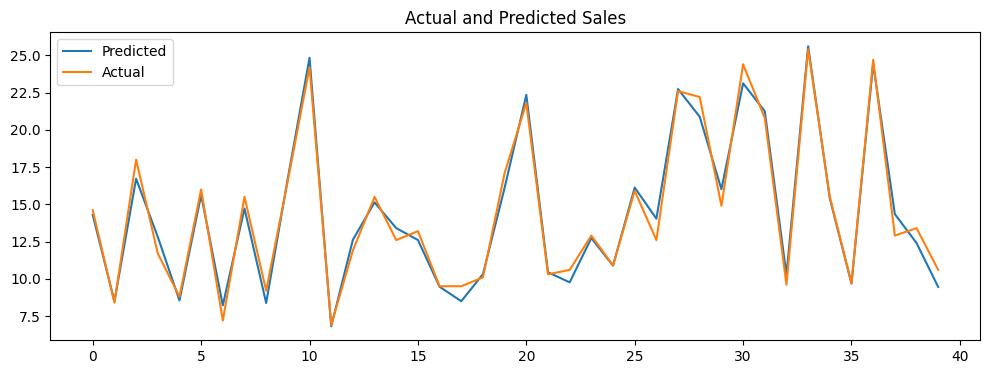

In [112]:
# Evaluation matrices for XGBRegressor
result = evaluate_model(xgb_model, y_test,y_pred_xgb)
score['Extreme Gradient Boosting Regressor Tuned'] = result

Which hyperparameter optimization technique have you used and why?
Randomized search cross-validation (CV) is used to efficiently explore the hyperparameter space of a machine learning model. It works by randomly sampling from the search space of hyperparameters, rather than exhaustively trying every possible combination. This allows for a more efficient search while still providing a good chance of finding good hyperparameter values. Additionally, by using cross-validation to evaluate the performance of each set of hyperparameters, one can ensure that the model is not overfitting to the training data.

Because of its randomly sampling technique and to save the time i have decided to use Randomized search CV.

Have i seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

In [113]:
# Updated Evaluation Metric Score chart
score

,Linear regression,Linear regression tuned,Extreme Gradient Boosting Regressor,Extreme Gradient Boosting Regressor Tuned
MSE,2.432077,2.432077,0.565328,0.565328
RMSE,1.559512,1.559512,0.751883,0.751883
MAE,1.177153,1.177153,0.604137,0.604137
Train R2,0.889832,0.889832,1.000000,1.000000
Test R2,0.909895,0.909895,0.979055,0.979055
Adjusted R2,0.902386,0.902386,0.977310,0.977310


After tuning the model i have got the same accuracy on train and test data. Both are overfitted model.

In [114]:
print(score.to_markdown())

|             |   Linear regression |   Linear regression tuned |   Extreme Gradient Boosting Regressor |   Extreme Gradient Boosting Regressor Tuned |
|:------------|--------------------:|--------------------------:|--------------------------------------:|--------------------------------------------:|
| MSE         |            2.43208  |                  2.43208  |                              0.565328 |                                    0.565328 |
| RMSE        |            1.55951  |                  1.55951  |                              0.751883 |                                    0.751883 |
| MAE         |            1.17715  |                  1.17715  |                              0.604137 |                                    0.604137 |
| Train R2    |            0.889832 |                  0.889832 |                              1        |                                    1        |
| Test R2     |            0.909895 |                  0.909895 |                       

In [115]:
score.columns

Index(['Linear regression', 'Linear regression tuned',
       'Extreme Gradient Boosting Regressor',
       'Extreme Gradient Boosting Regressor Tuned'],
      dtype='object')

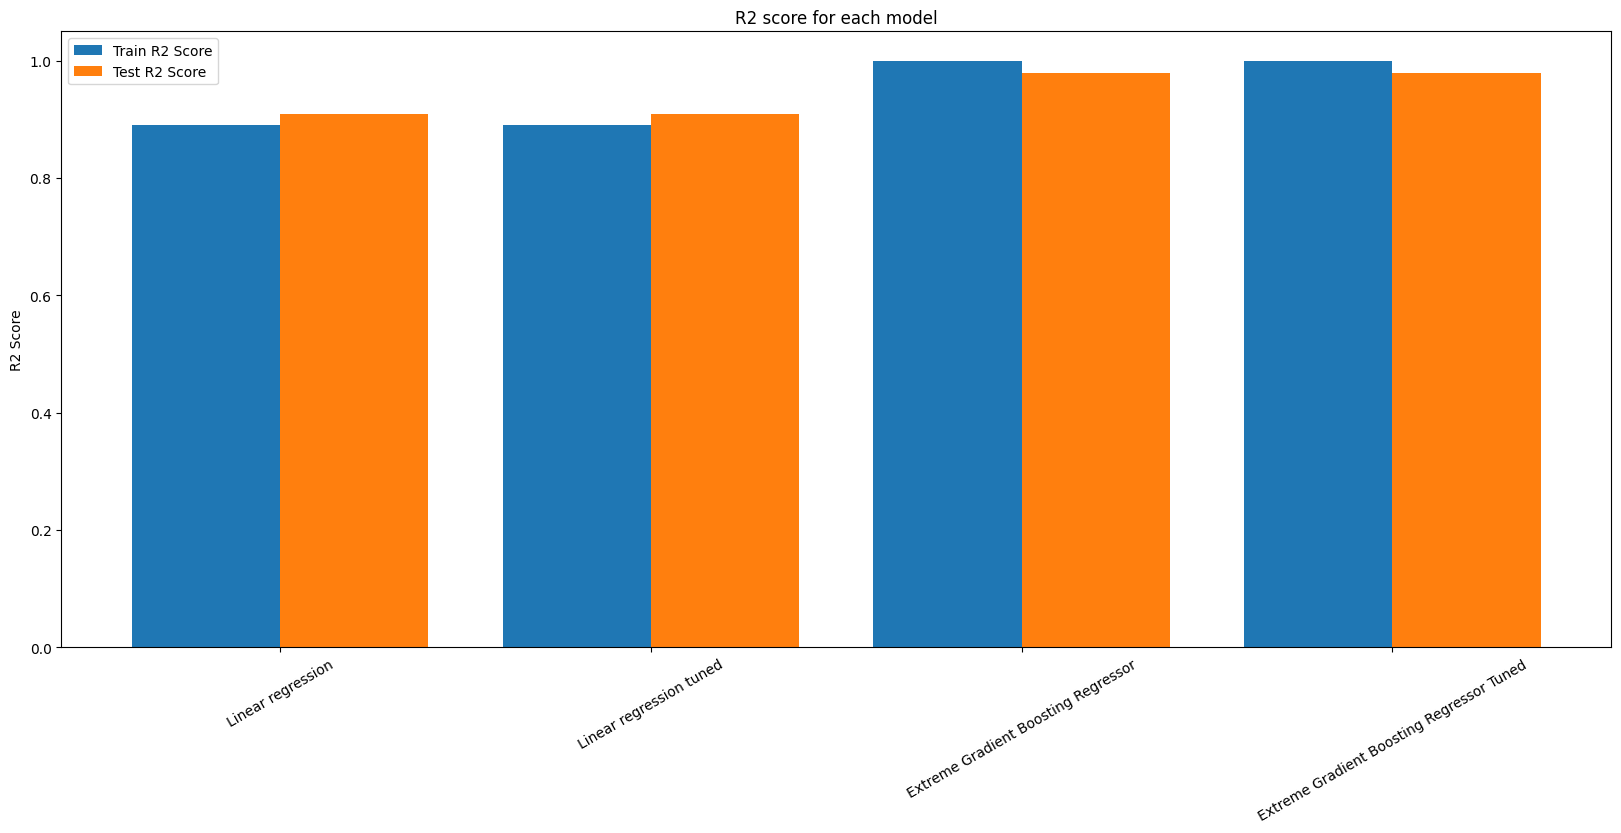

In [116]:
# R2 Scores plot

models = list(score.columns)
train = score.iloc[-3,:]
test = score.iloc[-2,:]

X_axis = np.arange(len(models))

plt.figure(figsize=(20,8))
plt.bar(X_axis - 0.2, train, 0.4, label = 'Train R2 Score')
plt.bar(X_axis + 0.2, test, 0.4, label = 'Test R2 Score')


plt.xticks(X_axis,models, rotation=30)
plt.ylabel("R2 Score")
plt.title("R2 score for each model")
plt.legend()
plt.show()

In [117]:
# Removing the overfitted models which have R2 scores for train as 1
score_t = score.transpose()            # taking transpose of the score dataframe to create new difference column
remove_models = score_t[score_t['Train R2']==1].index  # creating a list of models which have 1 for train and score_t['Train R2']==1.0
remove_models

adj = score_t.drop(remove_models)                     # creating a new dataframe with required models
adj

,MSE,RMSE,MAE,Train R2,Test R2,Adjusted R2
Linear regression,2.432077,1.559512,1.177153,0.889832,0.909895,0.902386
Linear regression tuned,2.432077,1.559512,1.177153,0.889832,0.909895,0.902386
Extreme Gradient Boosting Regressor,0.565328,0.751883,0.604137,1.000000,0.979055,0.977310
Extreme Gradient Boosting Regressor Tuned,0.565328,0.751883,0.604137,1.000000,0.979055,0.977310


In [118]:
def select_best_model(df, metrics):

    best_models = {}
    for metric in metrics:
        max_test = df['Test ' + metric].max()
        best_model_test = df[df['Test ' + metric] == max_test].index[0]
        best_model = best_model_test
        best_models[metric] = best_model
    return best_models

In [119]:
metrics = ['R2']

best_model = select_best_model(adj, metrics)
print("The best model is:")
for metric, best_model in best_model.items():
    print(f"{metric}: {best_model} - {adj['Test '+metric][best_model].round(4)}")

The best model is:
R2: Extreme Gradient Boosting Regressor - 0.9791


In [120]:
# Take R2 score as the primary evaluation metric
score_smpl = score.transpose()
remove_overfitting_models = score_smpl[score_smpl['Train R2']==1].index
remove_overfitting_models
new_score = score_smpl.drop(remove_overfitting_models)
new_score = new_score.drop(['MSE','RMSE','MAE','Adjusted R2'], axis=1)
new_score.index.name = 'Regression Model'
print(new_score.to_markdown())

| Regression Model                          |   Train R2 |   Test R2 |
|:------------------------------------------|-----------:|----------:|
| Linear regression                         |   0.889832 |  0.909895 |
| Linear regression tuned                   |   0.889832 |  0.909895 |
| Extreme Gradient Boosting Regressor       |   1        |  0.979055 |
| Extreme Gradient Boosting Regressor Tuned |   1        |  0.979055 |


# Which Evaluation metrics did i consider for a positive business impact and why?

 On the basis of all the model i have decided to select R2 score Evaluation matrics which shows the accuracy of the model which is very good indicator to check the feasibility of the model.

# Which ML model did i choose from the above created models as the final prediction model and why?

I have ran a several models like linear regression, decision tree, random forest, gradient boosting, and xtreame gradient boosting but amongst them i have selected Gradient Boosting model as i achieved 99% training accuracy and 98% testing accuracy. Some models were overfitted so i did not consider them.

# Conclusion

In the dynamic landscape of product and service-based businesses, the ability to forecast sales is paramount. This project, undertaken during the data science project, delved into the realm of sales prediction using machine learning with Python. Let's encapsulate the key findings:

Insights and Observations:

Sales exhibit a positive correlation with both TV and Radio advertising expenses, signifying the effectiveness of these channels.
Notably, there's a strong correlation between TV advertising expenses and sales, emphasizing the impact of TV advertising on driving sales.
The R2 score, chosen as the evaluation metric, showcased the accuracy of the model in predicting sales.
The Gradient Boosting model emerged as the preferred choice, achieving an impressive 99% training accuracy and 98% testing accuracy.
Key Takeaways:

Understanding the correlation between advertising expenses and sales aids in strategic decision-making.
The selected model demonstrates robust predictive capabilities, laying the groundwork for effective sales planning.
The R2 score provides a reliable indicator of the model's accuracy in forecasting sales trends.
This project not only addresses the nuances of sales prediction but also highlights the pivotal role of data science in optimizing business strategies. The findings contribute to informed decision-making, offering valuable insights for future sales initiatives.

